In [23]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import eigh

from scipy.linalg import eigh_tridiagonal

import jlinops

# Functions

In [24]:
def inv_sqrt_spd(A):
    """Returns A^{-1/2} given SPD matrix A.
    """

    eigres = np.linalg.eigh(A)
    C = eigres.eigenvectors @ np.diag( 1.0/np.sqrt(eigres.eigenvalues) ) @ eigres.eigenvectors.T

    return C

In [25]:
def lanczos_inv_sqrt_spd(A, b, m):
    """
    Approximates A^(1/2) b using the Lanczos process.

    Parameters:
    A (np.ndarray): SPD matrix.
    b (np.ndarray): Vector.
    m (int): Number of Lanczos iterations.

    Returns:
    np.ndarray: Approximation of A^(1/2) b.
    """
    n = A.shape[0]
    v = np.zeros((n, m + 1))
    alpha = np.zeros(m)
    beta = np.zeros(m)

    v[:, 0] = b / np.linalg.norm(b)
    w = np.zeros_like(b)

    for j in range(m):
        w = A @ v[:, j] - (beta[j-1] * v[:, j-1] if j > 0 else 0)
        alpha[j] = np.dot(v[:, j], w)
        w -= alpha[j] * v[:, j]
        
        if j < m - 1:
            beta[j] = np.linalg.norm(w)
            v[:, j + 1] = w / beta[j]

    T_alpha = alpha[:m]
    T_beta = beta[:m-1]

    eigvals, eigvecs = eigh_tridiagonal(T_alpha, T_beta)
    T_sqrt = eigvecs @ np.diag(1.0/np.sqrt(eigvals)) @ eigvecs.T

    e1 = np.zeros(m)
    e1[0] = np.linalg.norm(b)

    A_sqrt_b_approx = v[:, :m] @ T_sqrt @ e1

    return A_sqrt_b_approx

# # Example usage
# if __name__ == "__main__":
#     A = np.array([[4, 1], [1, 3]])
#     b = np.array([1, 0])
#     m = 2
#     result = lanczos_sqrt(A, b, m)
#     print(result)


# Test

In [57]:
n = 500
np.random.seed(0)
A, _ = jlinops.first_order_derivative_1d(n, boundary="zero")
A = A.toarray()
#A = np.random.normal(size=(n,n))
A = A.T @ A
b = np.random.normal(size=n)

Ctrue = inv_sqrt_spd(A)
ztrue = Ctrue @ b

print(np.linalg.cond(A))

406092.04266410175


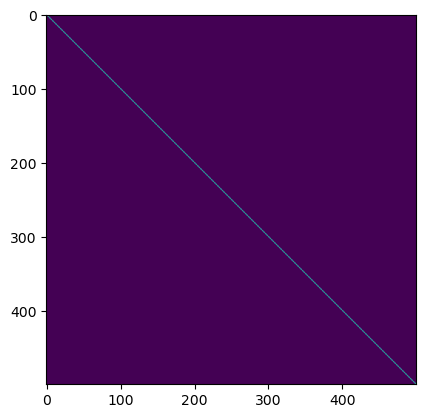

In [58]:
plt.imshow( (Ctrue @ Ctrue) @ A )
plt.show()

In [59]:
errs = []
ms = []
for j in range(1, 500):
    ms.append(j)
    tmp = lanczos_inv_sqrt_spd(A, b, j)
    errs.append( np.linalg.norm(tmp - ztrue) )

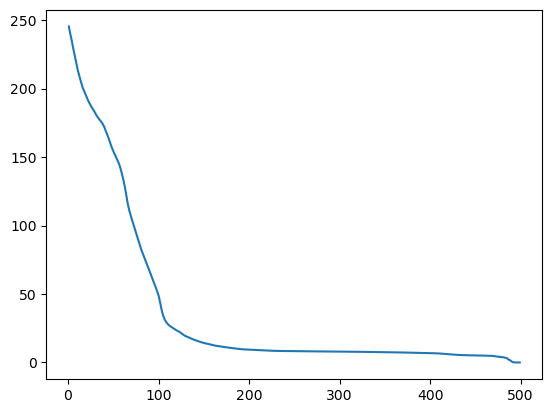

In [60]:
plt.plot(ms, errs)
plt.show()